In [44]:
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.datasets import load_boston 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import OLSInfluence


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example of Linear Regrtession using Diabetes data


In [8]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [9]:
# Use only one feature
diabetes_X = data_X[:, np.newaxis, 2]
#print(diabetes_X)

In [13]:
# Spliting the data into training/test sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [14]:
# Defining the model
model = linear_model.LinearRegression()
# Training the model using the training sets
fit_model = model.fit(diabetes_X_train, diabetes_y_train)
# Testing by making predictions using the test set
y_pred = fit_model.predict(diabetes_X_test)

In [19]:
print("The intercept, the average if all indep vb's 0:",fit_model.intercept_)
print("The coefficient, the impact of main indep ceteris paribus: \n",fit_model.coef_)
# The mean squared error, comparing the predicted y's with real y values
print('Mean Squared Error: %.2f'
      % mean_squared_error(diabetes_y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R_squared: %.2f'
      % r2_score(diabetes_y_test, y_pred))
# print("R-squared is: ", R_sq)

The intercept, the average if all indep vb's 0: 152.91886182616167
The coefficient, the impact of main indep ceteris paribus: 
 [938.23786125]
Mean Squared Error: 2548.07
R_squared: 0.47


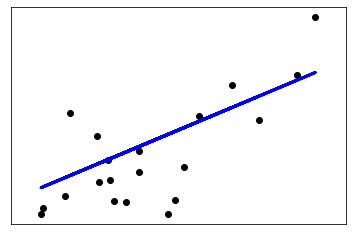

In [21]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

# Simple Linear Regression exapmle Boston data

In [35]:
boston = load_boston() # loading the data
X_ = boston.data # independent variables
Y_ = boston.target # dependent variables
Boston_data = np.column_stack([X_,Y_]) # combining them
col_names = np.append(boston.feature_names, 'MEDV') # getting the names
print(col_names)
Boston_df = pd.DataFrame(Boston_data, columns = col_names) # defining the dataframe
Boston_df.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
Boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [38]:
# dep vb > medv & indep vb > lstat
model = smf.ols('MEDV ~ LSTAT', data = Boston_df)
fit_model = model.fit()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        17:03:38   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
fit_model.params
# fit_model.fittedvalues
# fit_model.conf_int(alpha=0.05)


Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In [41]:
# given new values of X we can perform predictions
X_new = pd.DataFrame({'LSTAT': [5,10,15]})
Y_pred = fit_model.get_prediction(X_new)
#Y_pred.summary_frame(alpha = 0.05)

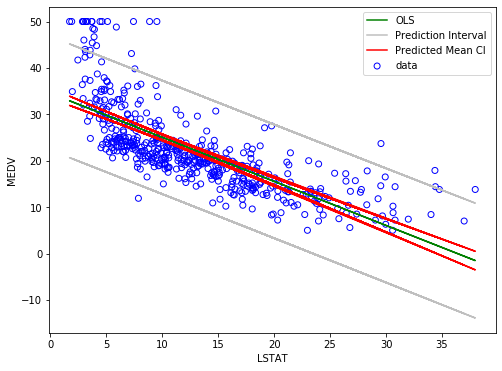

In [42]:
# plot to plot the data, OLS estimate, prediction and confidence intervals
fig, ax = plt.subplots(figsize=(8,6))
x = Boston_df.LSTAT

ax.scatter(x, Boston_df.MEDV, facecolors='none', edgecolors='b', label="data")
ax.plot(x, fit_model.fittedvalues, 'g', label="OLS")

# we need all prediction values to plot prediction and confidence intrvals
predictions = fit_model.get_prediction(Boston_df).summary_frame(alpha=0.05)

# plot the high and low prediction intervals
ax.plot(x, predictions.obs_ci_lower, color='0.75', label="Prediction Interval")
ax.plot(x, predictions.obs_ci_upper, color='0.75', label="")

# plot the high and low mean confidence intervals
ax.plot(x, predictions.mean_ci_lower, color='r',label="Predicted Mean CI")
ax.plot(x, predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

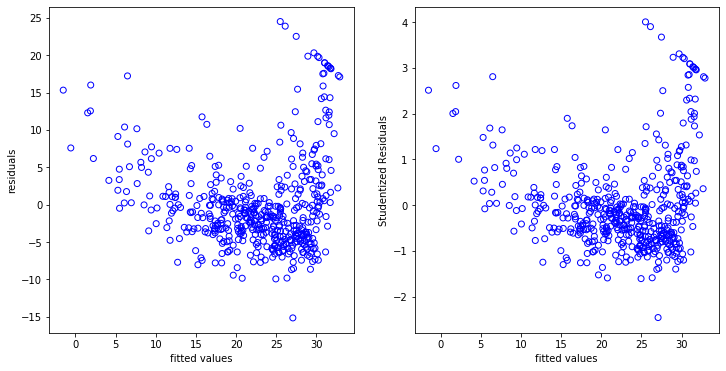

In [47]:
# For checking the Linearity, homoskedasticity, Outliers
influence = OLSInfluence(fit_model)
leverage = influence.hat_matrix_diag
studentized_res = influence.resid_studentized_external

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
# Plotting the residual for each fitted value
ax1.scatter(fit_model.fittedvalues, fit_model.resid, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');

# Plotting the studentized residuals
ax2.scatter(fit_model.fittedvalues, studentized_res, facecolors='none', edgecolors='b');
ax2.set_ylabel('Studentized Residuals');
ax2.set_xlabel('fitted values');


In [ ]:
# obvious non-linear patters
# there are also outliers,
# because |studentized residual| > 3 are generally considered outliers
# heteroskedasticty

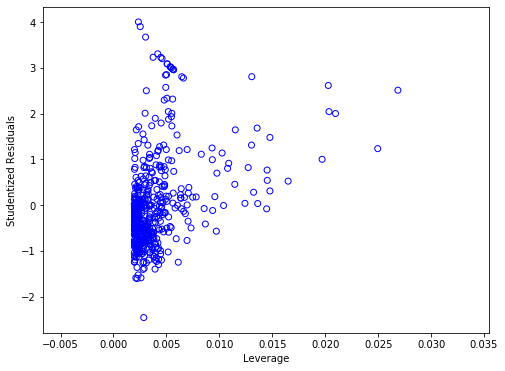

In [48]:
# Cheking for High-leverage points
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, studentized_res,facecolors='none', edgecolors='b');
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');